In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('US_Accidents_May19.csv')

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])
print('\nFeatures :\n    :', df.columns.tolist())
print('\nMissing values :', df.isnull().values.sum())
print('\nUnique values : \n', df.nunique())

Rows:  2243939
Columns:  49

Features :
    : ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values : 10152876

Unique values : 
 ID                       2243939
Source                         3
TMC                           21
Severity                       5
Start_Time               2086185
End_Time                 2079472
Start_Lat                 770318
St

In [5]:
df.select_dtypes(exclude=['int', 'float']).columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Description',
       'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [6]:
df['Description'].head()

0    Right lane blocked due to accident on I-70 Eas...
1    Accident on Brice Rd at Tussing Rd. Expect del...
2    Accident on OH-32 State Route 32 Westbound at ...
3    Accident on I-75 Southbound at Exits 52 52B US...
4    Accident on McEwen Rd at OH-725 Miamisburg Cen...
Name: Description, dtype: object

In [8]:
print(df['Source'].unique())
print(df['Description'].unique())
print(df['Timezone'].unique())
print(df['Amenity'].unique())

['MapQuest' 'MapQuest-Bing' 'Bing']
['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.'
 'Accident on Brice Rd at Tussing Rd. Expect delays.'
 'Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.'
 ... 'At Adobe/Twin Rocks Rd/Exit 175 - Accident.'
 'Between Cesar E Chavez Ave and I-5/I-10 Northern Split - Accident.'
 'Closed between CA-14/Exit 162 and I-210 - Road closed due to accident.']
['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
[False  True]


In [9]:
df.isnull().sum()

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

In [10]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

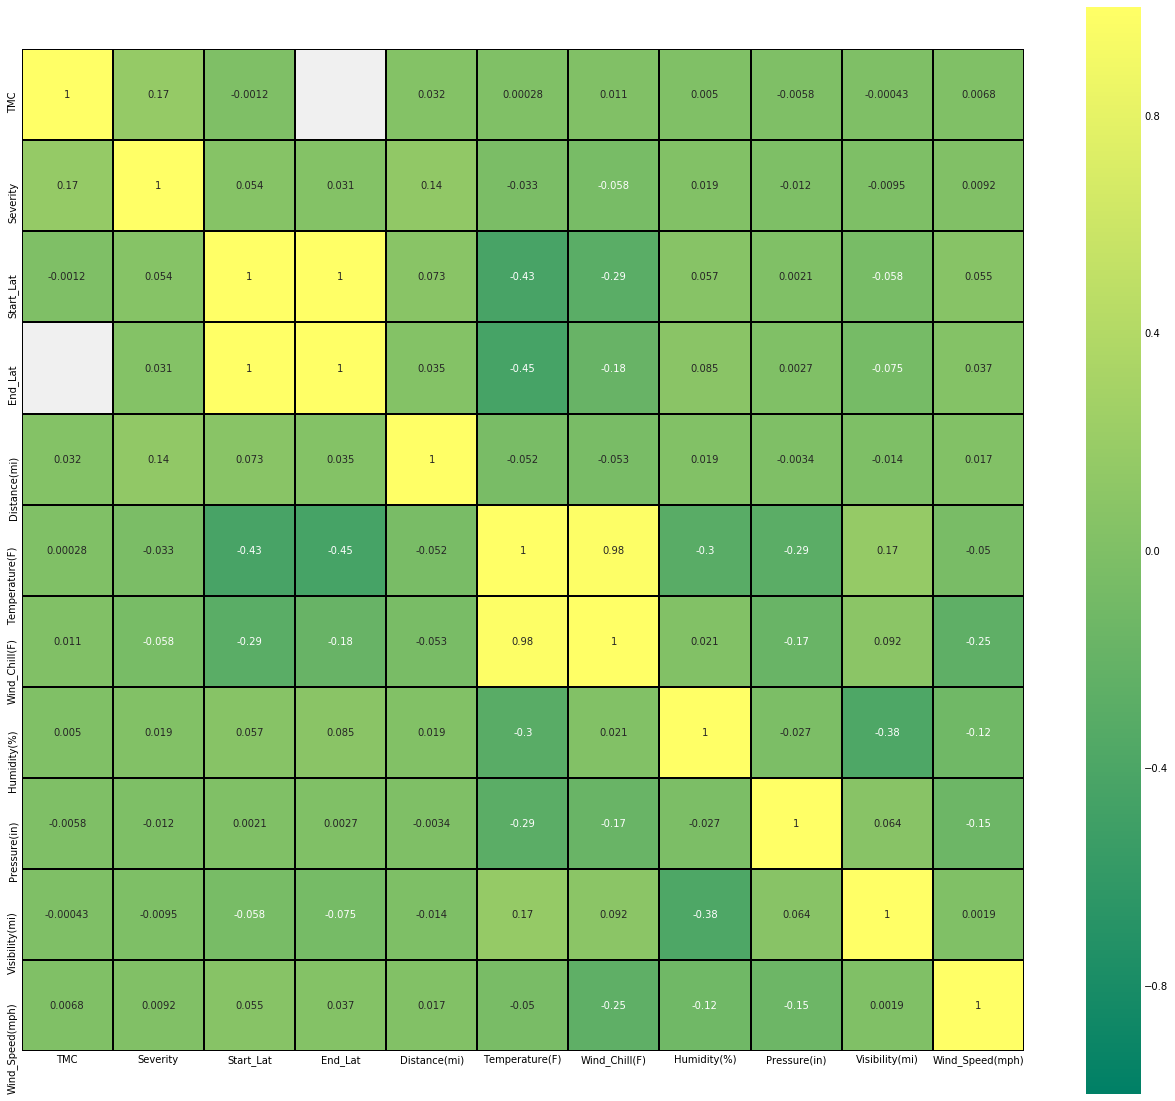

In [13]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig=sns.heatmap(df[['TMC', 'Severity', 'Start_Lat', 'End_Lat', 'Distance(mi)',
                   'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                   'Visibility(mi)', 'Wind_Speed(mph)']].corr(), annot=True,
               cmap='summer', linewidths=1, linecolor='k', square=True, mask=False,
               vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)

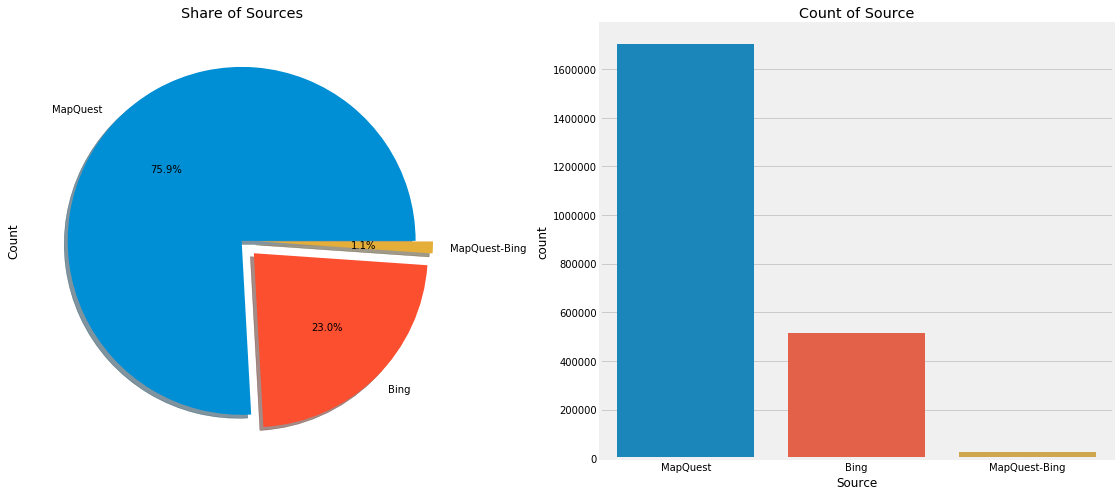

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Source'].value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')

sns.countplot('Source', data=df, ax=ax[1], order=df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

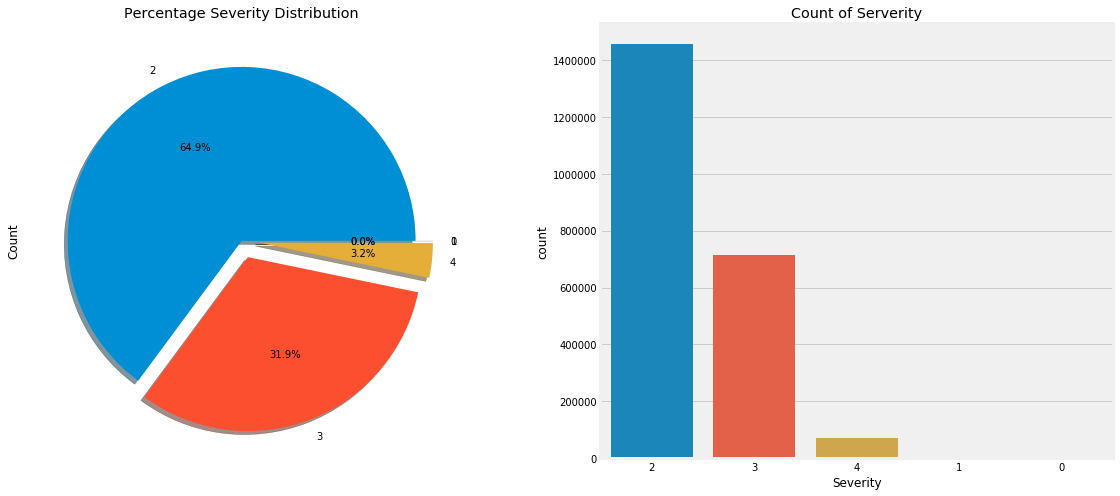

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Severity'].value_counts().plot.pie(explode=[0, 0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')

sns.countplot('Severity', data=df, ax=ax[1], order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Serverity')
plt.show()

Text(0, 0.5, 'Fraction')

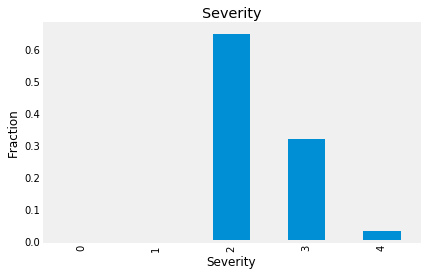

In [26]:
df.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction')

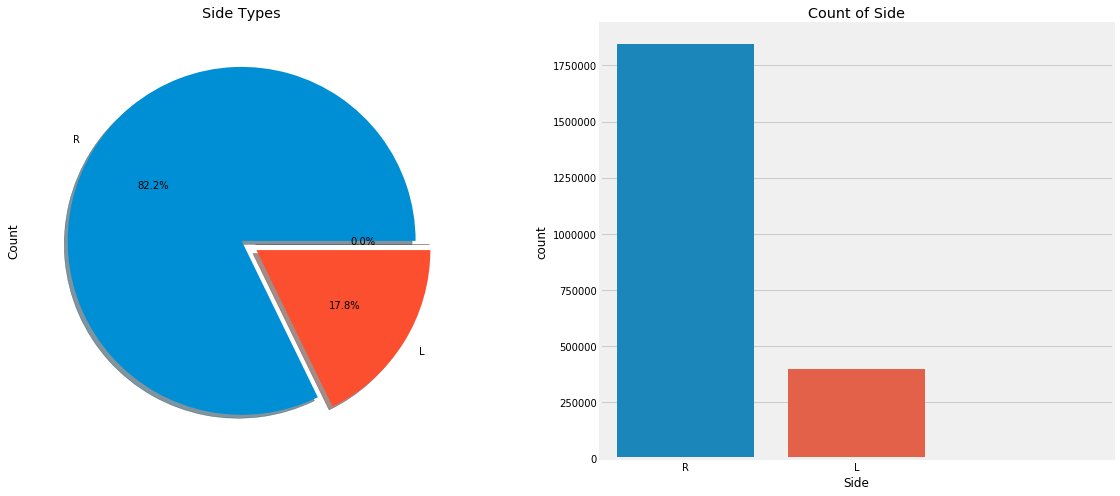

In [30]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Side'].value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Side Types')
ax[0].set_ylabel('Count')
sns.countplot('Side', data=df, ax=ax[1], order=df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

In [31]:
df['Side'].unique()

array(['R', 'L', ' '], dtype=object)

In [32]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

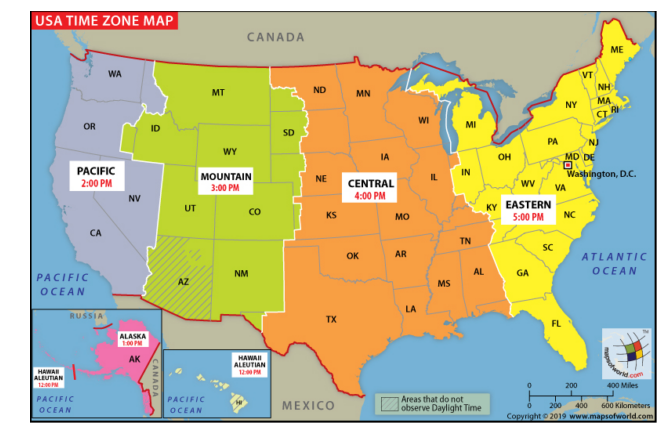

In [33]:
img=np.array(Image.open('usa-timezone-map.jpg'))
fig = plt.figure(figsize=(10, 10))
plt.imshow(img, interpolation='bilinear')
plt.axis('Off')
plt.show()

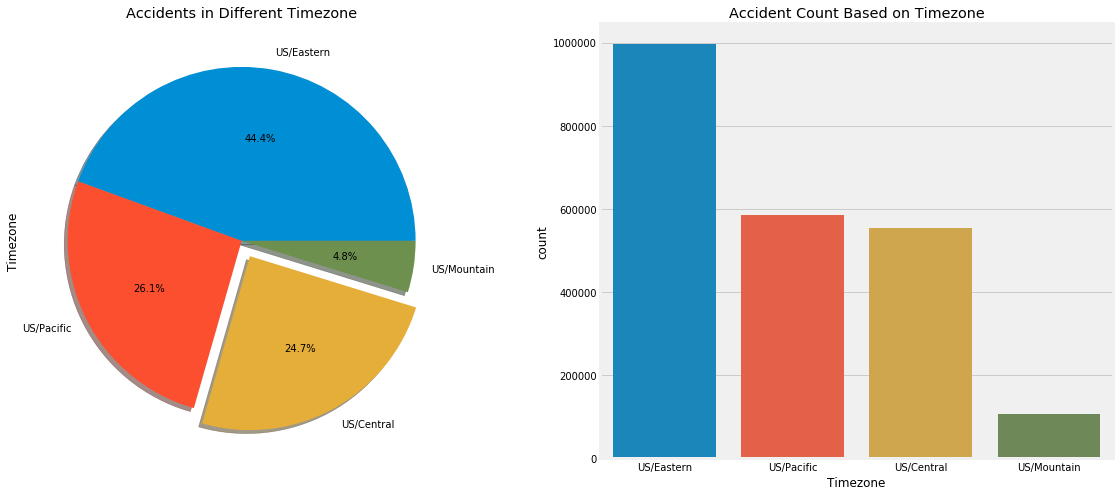

In [43]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Timezone'].value_counts().plot.pie(explode=[0, 0, 0.1, 0], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Accidents in Different Timezone')
sns.countplot('Timezone', data=df, ax=ax[1], order=df['Timezone'].value_counts().index)
ax[1].set_title('Accident Count Based on Timezone')
plt.show()

In [44]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

Top 20 accident durations corresponds to 96.1% of the date


Text(0, 0.5, 'Fraction')

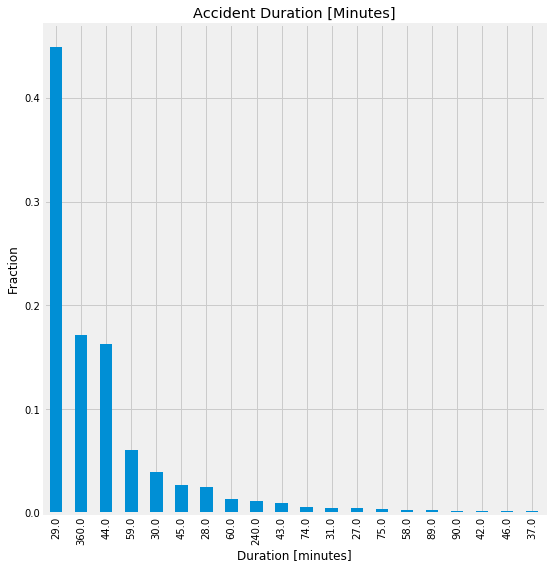

In [45]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('Top 20 accident durations corresponds to {:.1f}% of the date'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(8,9))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction')


Text(0, 0.5, '')

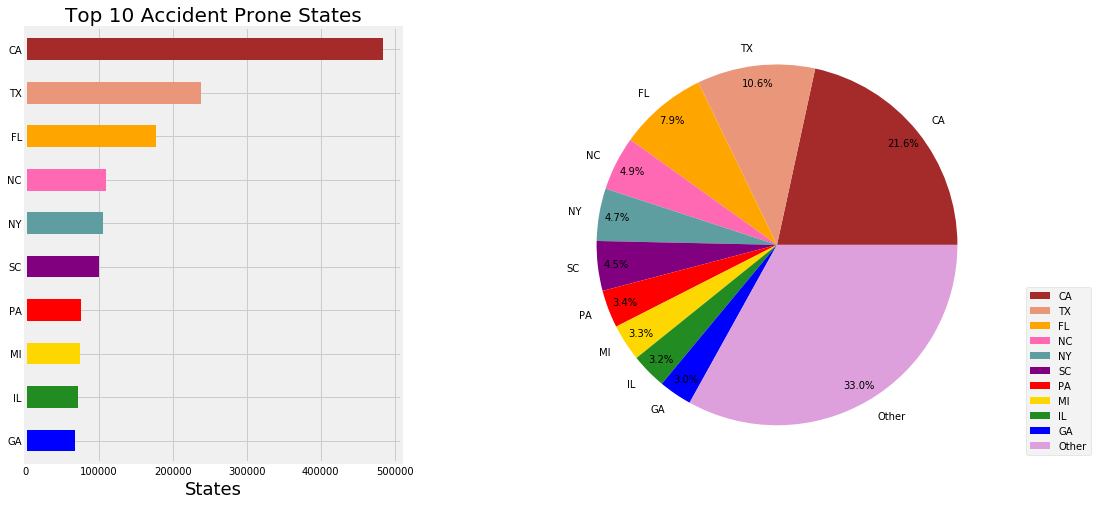

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
clr = ("blue", "forestgreen", "gold", "red", "purple", "cadetblue", "hotpink", "orange", "darksalmon", "brown")
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh', color=clr, ax=ax[0])
ax[0].set_title("Top 10 Accident Prone States", size=20)
ax[0].set_xlabel('States', size=18)

count = df['State'].value_counts()
groups = list(df['State'].value_counts().index)[:10]
counts = list(count[:10])
counts.append(count.agg(sum) - count[:10].agg('sum'))
groups.append('Other')
type_dict = pd.DataFrame({"group": groups, "counts":counts})
clr1 = ('brown', 'darksalmon', 'orange', 'hotpink', 'cadetblue', 'purple', 'red', 'gold', 'forestgreen', 'blue', 'plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups, colors=clr1, autopct='%1.1f%%', pctdistance=0.9, radius=1.2, 
                   ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15, 0.4))
plt.subplots_adjust(wspace=0.5, hspace=0)
plt.ioff()
plt.ylabel('')

In [51]:
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

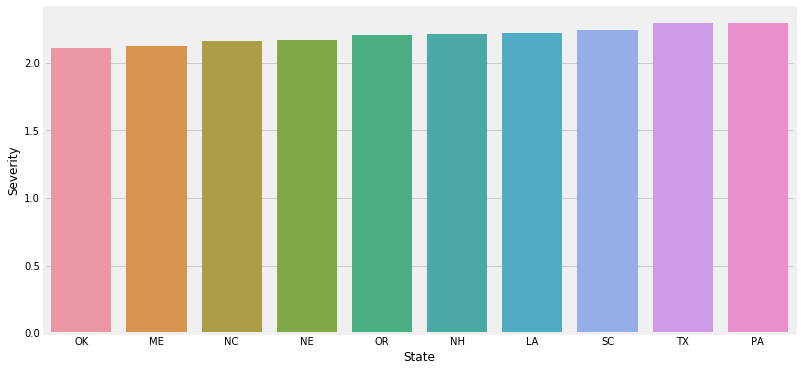

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Severity', x='State', data=df_top_Severity_State.head(10))
plt.ioff()

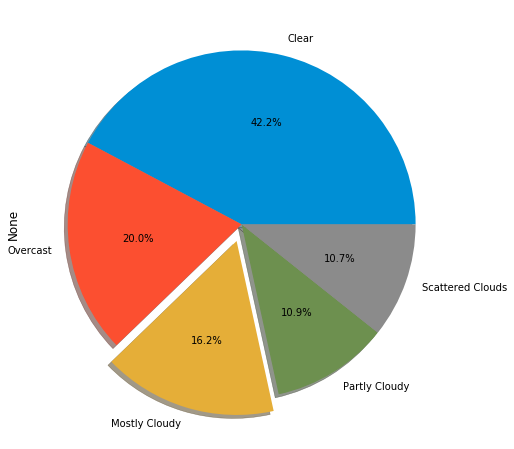

In [59]:
plt.figure(figsize=(14, 8))
df.groupby('Weather_Condition') \
.size() \
.sort_values(ascending=False) \
.iloc[:5] \
.plot.pie(explode=[0, 0, 0.1, 0, 0], autopct='%1.1f%%', shadow=True)
plt.ioff()

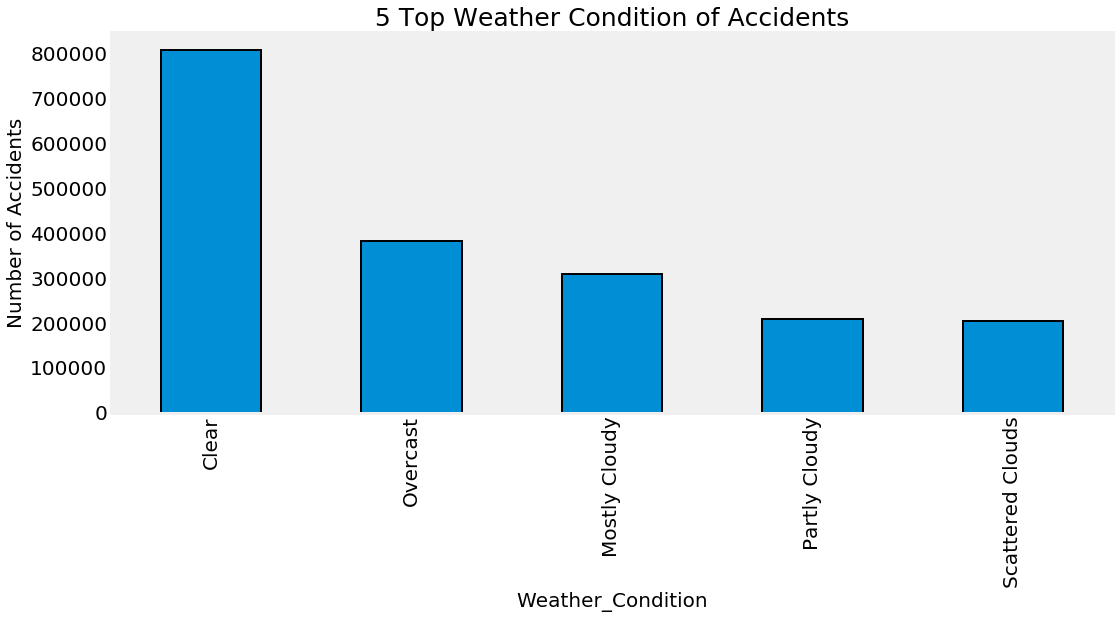

In [61]:
fig, ax = plt.subplots(figsize=(16, 7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5, edgecolor='k',
                                                                                    align='center', linewidth=2)
plt.xlabel('Weather_Condition', fontsize=20)
plt.ylabel('Number of Accidents', fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition of Accidents', fontsize=25)
plt.grid()
plt.ioff()

In [63]:
bool_cols = [col for col in df.columns if df[col].dtype==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} not one hot metadate rows, which are {:.1f}% of the data'.format(len(not_one_hot), 
                                                                                    100*len(not_one_hot)/len(df)))

There are 134798 not one hot metadate rows, which are 6.0% of the data


In [64]:
bools =booldf.sum(axis=0)

In [65]:
bools

Amenity             25977
Bump                  239
Crossing           121783
Give_Way             4724
Junction           187365
No_Exit              2166
Railway             18198
Roundabout            128
Station             36225
Stop                21771
Traffic_Calming       618
Traffic_Signal     358648
Turning_Loop            0
dtype: int64

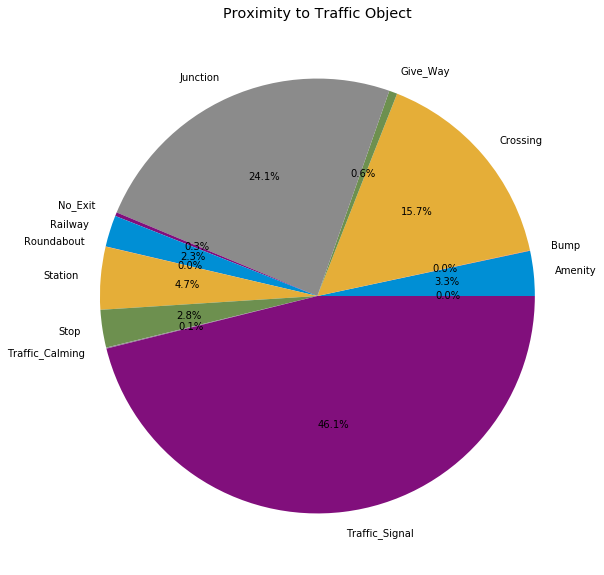

In [67]:
bools.plot.pie(autopct='%1.1f%%', shadow=False, figsize=(10, 10))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

In [69]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2016-02-08 05:46:00
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,2016-02-08 06:07:59
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,2016-02-08 06:49:27
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,2016-02-08 07:23:34
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,2016-02-08 07:39:07


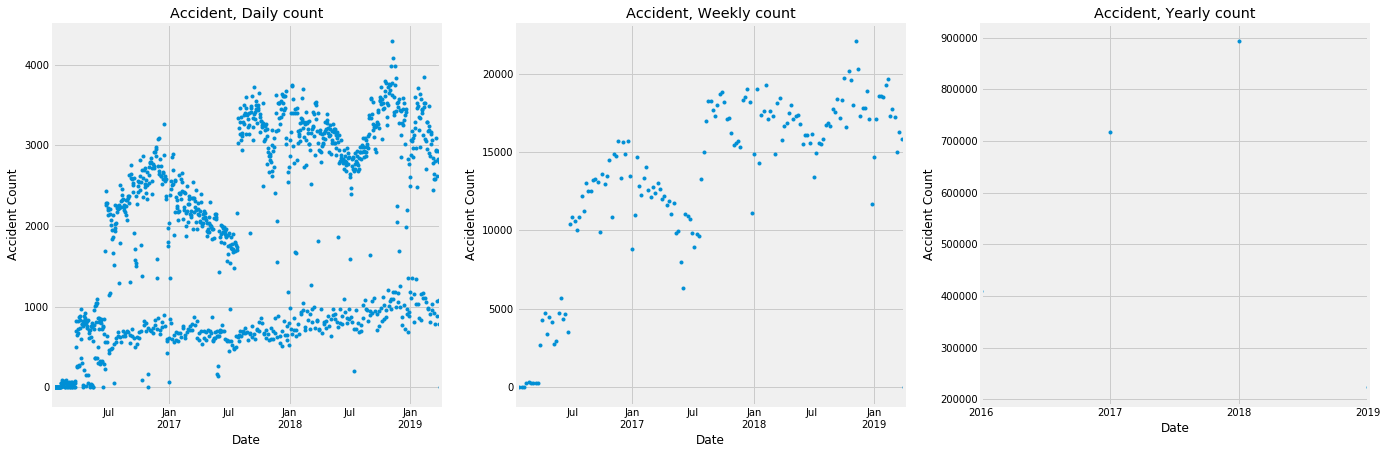

In [71]:
freq_text = {'D':'Daily', 'W':'Weekly', 'Y':'Yearly'}
plt.subplots(1, 3, figsize=(21, 7))
for i, (fr, text) in enumerate(freq_text.items(), 1):
    plt.subplot(1, 3, i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accident, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count')

In [73]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y/%m/%d %H:%M:%S")
df['DayOfWeekNum'] = df['Start_Time'].dt.dayofweek
df['DayOfWeek'] = df['Start_Time'].dt.weekday_name
df['MonthDayNum'] = df['Start_Time'].dt.day
df['HourOfDay'] = df['Start_Time'].dt.hour

In [74]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,Night,Night,Night,Night,2016-02-08 05:46:00,0,Monday,8,5
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,Night,Night,Night,Day,2016-02-08 06:07:59,0,Monday,8,6
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,Night,Night,Day,Day,2016-02-08 06:49:27,0,Monday,8,6
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,Night,Day,Day,Day,2016-02-08 07:23:34,0,Monday,8,7
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,Day,Day,Day,Day,2016-02-08 07:39:07,0,Monday,8,7


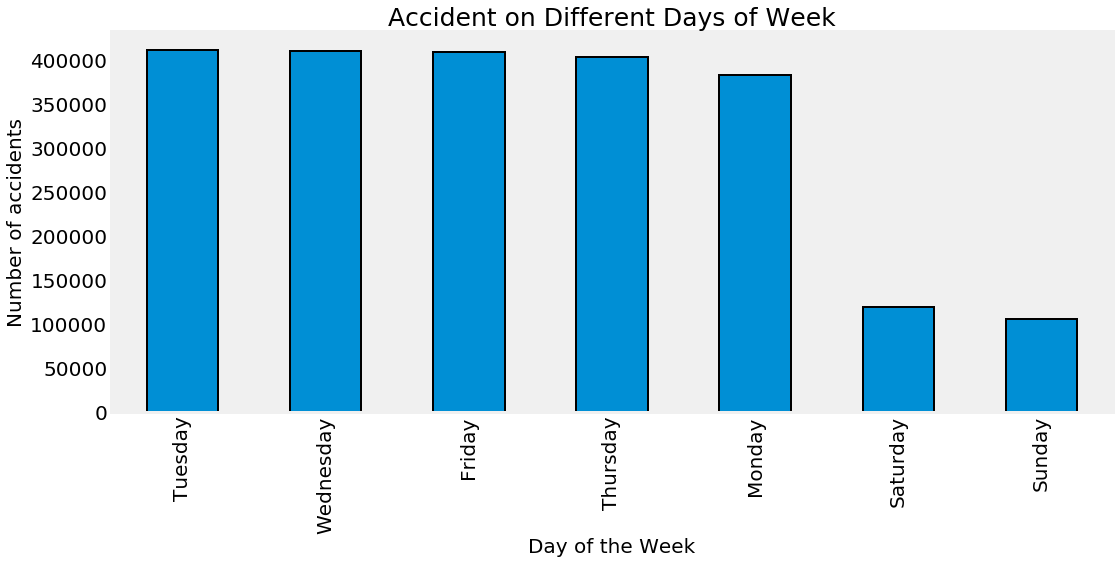

In [77]:
fig, ax = plt.subplots(figsize=(16, 7))
df['DayOfWeek'].value_counts(ascending=False).plot.bar(width=0.5, edgecolor='k', align='center', linewidth=2)
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel('Number of accidents', fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week', fontsize=25)
plt.grid()
plt.ioff()

In [79]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df["Description"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5, max_words=1000, colormap="rainbow", background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(20, 14))
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Accident Description", color='b')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

C:\Users\Muffin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


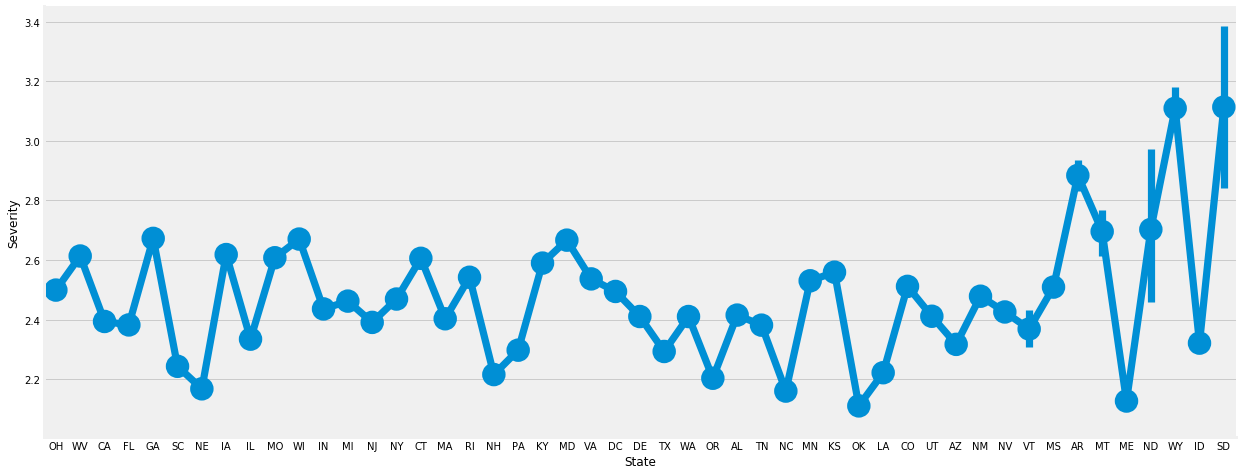

In [83]:
sns.factorplot('State', 'Severity', data=df)
fig = plt.gcf()
fig.set_size_inches(20, 7)
plt.show()

<Figure size 1008x576 with 0 Axes>

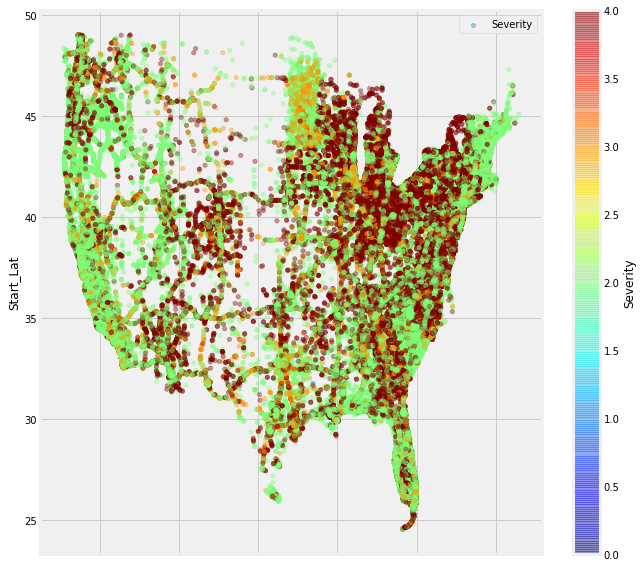

In [85]:
plt.figure(figsize=(14, 8))
sub_6 = df[df.Severity < 5]
viz_4 = sub_6.plot(kind='scatter', x='Start_Lng', y='Start_Lat', label='Severity', c='Severity',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,10))
viz_4.legend()
plt.ioff()